### Part 1. Colleges

#### 1. Perform PCA analysis on the college dataset and plot the first two principal components. Describe the results.

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
# Read Data
collegeframe = pd.read_csv('College.csv')
collegeframe.loc[collegeframe['Private'] == 'Yes', 'Private'] = 'Private'
collegeframe.loc[collegeframe['Private'] == 'No', 'Private'] = 'Public'

In [3]:
# Read data and their lables
college = collegeframe.iloc[:, 1:].values
var_names = collegeframe.columns.values[1:]

In [4]:
# load PCA
pca = PCA()
college_std = StandardScaler().fit_transform(college)
college_r = pca.fit(college_std).transform(college_std)

In [5]:
# define a function that plots the first two principals
def pca_plot():
    # Configure the plot
    plt.close
    plt.figure(figsize=(9,6))
    plt.xlim(-0.6, 0.6)
    plt.ylim(-0.6, 0.6)
    plt.axvline(x=0, linewidth=1, color='r', alpha=0.5, ls='dotted')
    plt.axhline(y=0, linewidth=1, color='r', alpha=0.5, ls='dotted')
    plt.title('Fig 1. The first two principal components for the colleges data (Standardized)')
    plt.xlabel('First Principle Component')
    plt.ylabel('Second Principle Component')
    # Plot the labels
    for i, j, l in zip(var_names, pca.components_[0], pca.components_[1]):
        plt.annotate(i, (j*1.2, l*1.2), color='red')
    # Plot the vectors
    for i, j in zip(pca.components_[0], pca.components_[1]):
        plt.arrow(0, 0, i, j)
    # Plot
    plt.show()

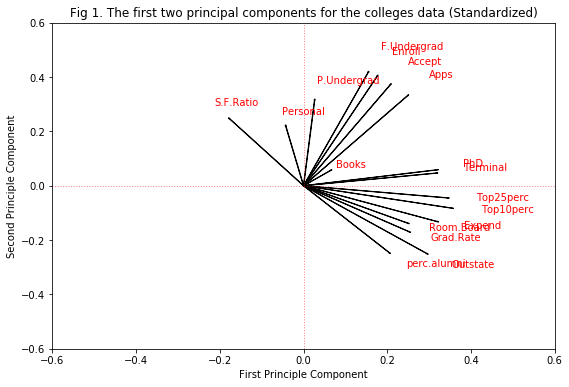

In [6]:
# Execute the function
pca_plot()

##### What variables appear strongly correlated on the first principal component?

##### What about the second principal component?

In [7]:
X = pd.DataFrame(pca.components_[:2])
X.columns = var_names
X

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.248766,0.207602,0.176304,0.354274,0.344001,0.154641,0.026443,0.294736,0.249030,0.064758,-0.042529,0.318313,0.317056,-0.176958,0.205082,0.318909,0.252316
1,0.331598,0.372117,0.403724,-0.082412,-0.044779,0.417674,0.315088,-0.249644,-0.137809,0.056342,0.219929,0.058311,0.046429,0.246665,-0.246595,-0.131690,-0.169241


In [8]:
X_1 = [j for i, j in zip(pca.components_[0], X.columns.values) if abs(i) > 0.3]
X_1_l = ', '.join(X_1)
X_2 = [j for i, j in zip(pca.components_[1], X.columns.values) if abs(i) > 0.3]
X_2_l = ', '.join(X_2)
print(f'The variables "{X_1_l}" are strongly correlated with the first component [abs(loadings) > 0.3].')
print(f'The variables "{X_2_l}" are strongly correlated with the second component [abs(loadings) > 0.3].')

The variables "Top10perc, Top25perc, PhD, Terminal, Expend" are strongly correlated with the first component [abs(loadings) > 0.3].
The variables "Apps, Accept, Enroll, F.Undergrad, P.Undergrad" are strongly correlated with the second component [abs(loadings) > 0.3].


#### 2.Calculate the *cumulative proportion of variance explained* by all the principal components (see 10.2.3 in ISLR). Approximately how much of the variance in College is explained by the first two principal components?

In [9]:
# Define a function that plots of c.d.f of the variance explained by principal components.
def var_explained():
    from matplotlib.ticker import MaxNLocator
   
    ax = plt.figure(figsize=(9,6)).gca()
    ax.plot(list(range(len(var_names))), np.cumsum(pca.explained_variance_ratio_),  '-s', label='Cumulative')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.axvline(x=1, linewidth=1, color='r', alpha=0.5)
    plt.title('Explained Variance of PCA by Component')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.legend(loc='best')
    plt.show()

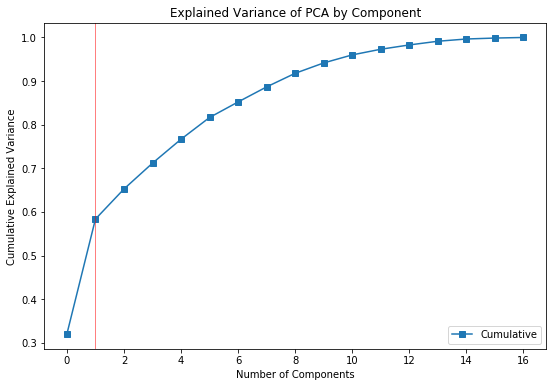

In [10]:
# Execute the function
var_explained()

#### Approximately how much of the variance in College is explained by the first two principal components?

In [11]:
print(f'The first two principle components explain {round(pca.explained_variance_ratio_[:2].sum()*100,2)}% of the variance.')

The first two principle components explain 58.36% of the variance.
